In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("../../data/processed/total.csv")

In [3]:
df.head()

,Unnamed: 0,year,playername,team,age,attempts,yards_run,tds_run,longgain_run,yardsperatt,...,catchpercent,yards_rec,yardsperrec,tds_rec,firstdowns,longgain_rec,yardspertarget,recpergame,yardspergame_rec,fumbles
0,0,2020,Aaron Jones,GNB,26,75,389,5,75,5.2,...,73.3%,261,7.9,2,12,30,5.8,3.7,29.0,2.0
1,1,2019,Aaron Jones,GNB,25,236,1084,16,56,4.6,...,72.1%,474,9.7,3,18,67,7.0,3.1,29.6,3.0
2,2,2018,Aaron Jones,GNB,24,133,728,8,67,5.5,...,74.3%,206,7.9,1,12,24,5.9,2.2,17.2,1.0
3,3,2017,Aaron Jones,GNB,23,81,448,4,46,5.5,...,50.0%,22,2.4,0,2,9,1.2,0.8,1.8,0.0
4,4,2020,Adrian Peterson,DET,35,80,314,2,27,3.9,...,68.8%,78,7.1,0,3,18,4.9,1.0,7.1,0.0


In [4]:
df = df.drop('year',axis=1)
df = df.drop('playername',axis=1)
df = df.drop('team',axis=1)
df = df.drop('basesalarycap (10^8)',axis=1)
df = df.drop('cashspent (M)',axis=1)
df = df.drop('caphit (M)',axis=1)
df = df.drop('Unnamed: 0',axis=1)

In [5]:
df.head()

,age,attempts,yards_run,tds_run,longgain_run,yardsperatt,yardspergame_run,Percenthit (%),g,gs,...,catchpercent,yards_rec,yardsperrec,tds_rec,firstdowns,longgain_rec,yardspertarget,recpergame,yardspergame_rec,fumbles
0,26,75,389,5,75,5.2,77.8,1.100909,9,9,...,73.3%,261,7.9,2,12,30,5.8,3.7,29.0,2.0
1,25,236,1084,16,56,4.6,67.8,0.369547,16,16,...,72.1%,474,9.7,3,18,67,7.0,3.1,29.6,3.0
2,24,133,728,8,67,5.5,60.7,0.293098,12,8,...,74.3%,206,7.9,1,12,24,5.9,2.2,17.2,1.0
3,23,81,448,4,46,5.5,37.3,0.308675,12,4,...,50.0%,22,2.4,0,2,9,1.2,0.8,1.8,0.0
4,35,80,314,2,27,3.9,52.3,0.529768,11,8,...,68.8%,78,7.1,0,3,18,4.9,1.0,7.1,0.0


In [6]:
df['catchpercent']

0      73.3%
1      72.1%
2      74.3%
3      50.0%
4      68.8%
       ...  
598    46.2%
599    72.7%
600    75.0%
601    78.3%
602    74.3%
Name: catchpercent, Length: 603, dtype: object

In [7]:
df['catchpercent'] = df['catchpercent'].str[:-1]

In [8]:
df['catchpercent']

0      73.3
1      72.1
2      74.3
3      50.0
4      68.8
       ... 
598    46.2
599    72.7
600    75.0
601    78.3
602    74.3
Name: catchpercent, Length: 603, dtype: object

In [9]:
df.head()

,age,attempts,yards_run,tds_run,longgain_run,yardsperatt,yardspergame_run,Percenthit (%),g,gs,...,catchpercent,yards_rec,yardsperrec,tds_rec,firstdowns,longgain_rec,yardspertarget,recpergame,yardspergame_rec,fumbles
0,26,75,389,5,75,5.2,77.8,1.100909,9,9,...,73.3,261,7.9,2,12,30,5.8,3.7,29.0,2.0
1,25,236,1084,16,56,4.6,67.8,0.369547,16,16,...,72.1,474,9.7,3,18,67,7.0,3.1,29.6,3.0
2,24,133,728,8,67,5.5,60.7,0.293098,12,8,...,74.3,206,7.9,1,12,24,5.9,2.2,17.2,1.0
3,23,81,448,4,46,5.5,37.3,0.308675,12,4,...,50.0,22,2.4,0,2,9,1.2,0.8,1.8,0.0
4,35,80,314,2,27,3.9,52.3,0.529768,11,8,...,68.8,78,7.1,0,3,18,4.9,1.0,7.1,0.0


# Splitting & Scaling

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop('Percenthit (%)',axis=1).values
y = df['Percenthit (%)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# DNN Model

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
X_train.shape
model = Sequential()

model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")
model.fit(x=X_train, y= y_train, validation_data=(X_test,y_test),batch_size=10,epochs=100)

Epoch 1/100
43/43 [==============================] - 0s 4ms/step - loss: 6.6406 - val_loss: 5.9464
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 5.6049 - val_loss: 4.6366
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 3.9137 - val_loss: 3.5656
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 3.4428 - val_loss: 3.5051
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 3.3869 - val_loss: 3.4639
Epoch 6/100
43/43 [==============================] - 0s 1ms/step - loss: 3.3348 - val_loss: 3.4008
Epoch 7/100
43/43 [==============================] - 0s 1ms/step - loss: 3.2797 - val_loss: 3.3749
Epoch 8/100
43/43 [==============================] - 0s 2ms/step - loss: 3.2252 - val_loss: 3.2755
Epoch 9/100
43/43 [==============================] - 0s 1ms/step - loss: 3.1940 - val_loss: 3.2691
Epoch 10/100
43/43 [==============================] - 0s 1ms/step - loss: 3.1005 - val_loss: 3.1220
Epoch 11/

Epoch 83/100
43/43 [==============================] - 0s 2ms/step - loss: 1.9805 - val_loss: 2.3521
Epoch 84/100
43/43 [==============================] - 0s 1ms/step - loss: 1.9501 - val_loss: 2.4043
Epoch 85/100
43/43 [==============================] - 0s 2ms/step - loss: 1.9605 - val_loss: 2.3171
Epoch 86/100
43/43 [==============================] - 0s 1ms/step - loss: 2.0521 - val_loss: 2.5453
Epoch 87/100
43/43 [==============================] - 0s 2ms/step - loss: 1.9741 - val_loss: 2.5756
Epoch 88/100
43/43 [==============================] - 0s 2ms/step - loss: 1.9235 - val_loss: 2.4154
Epoch 89/100
43/43 [==============================] - 0s 2ms/step - loss: 1.9339 - val_loss: 2.3956
Epoch 90/100
43/43 [==============================] - 0s 1ms/step - loss: 1.9121 - val_loss: 2.7636
Epoch 91/100
43/43 [==============================] - 0s 1ms/step - loss: 1.9520 - val_loss: 2.8328
Epoch 92/100
43/43 [==============================] - 0s 2ms/step - loss: 1.9737 - val_loss: 2.3839


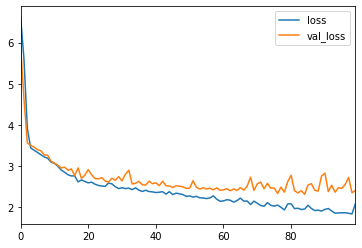

In [14]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Evaluation

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
predictions = model.predict(X_test)

In [16]:
print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )

MSE:  2.4136686807724903
RMSE:  1.5535986228020706
MAE:  1.0827262653533807


In [17]:
explained_variance_score(y_test,predictions)

0.41538329573339805

In [18]:
x_te

array([[2.1044648 ],
       [0.77864605],
       [1.4122305 ],
       [2.6628559 ],
       [4.544624  ],
       [0.57713735],
       [1.2235801 ],
       [1.9693885 ],
       [0.44625932],
       [4.969955  ],
       [1.1949315 ],
       [0.37028277],
       [1.7868094 ],
       [0.2685408 ],
       [0.77861017],
       [0.3971213 ],
       [1.3678157 ],
       [3.3253791 ],
       [1.1236007 ],
       [1.5222342 ],
       [0.7547274 ],
       [0.81632906],
       [0.8454899 ],
       [2.165121  ],
       [0.8028609 ],
       [1.3703141 ],
       [0.637914  ],
       [0.7596918 ],
       [6.023104  ],
       [0.65250266],
       [0.43419522],
       [2.0062454 ],
       [3.1887367 ],
       [3.9526553 ],
       [0.7959841 ],
       [0.7259091 ],
       [1.5551713 ],
       [1.5253439 ],
       [0.7558965 ],
       [3.347265  ],
       [1.8718965 ],
       [3.0591342 ],
       [4.4456697 ],
       [2.5362012 ],
       [0.89160734],
       [1.1149625 ],
       [3.1169922 ],
       [0.649